In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import bootcampviztools as bvt
import warnings 
warnings.filterwarnings('ignore')

df_vg = pd.read_csv("../EDA/src/data/vgchartz-2024.csv")

In [52]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [53]:
# Se verifica la existencia y cantidad de valores nulos presentes en el Dataset

df_vg.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [54]:
# Se verifica si en el Dataset existen duplicados

df_vg.duplicated().sum()

np.int64(0)

In [55]:
# La columna "genre" la podria considerar categorica si se agrupan los valores con menos incidencias

genre_counts = df_vg.genre.value_counts(dropna=False)

# Inicializar un diccionario vacío
diccionario = {}

# Iterar sobre la Series usando un bucle
for indice, valor in genre_counts.items():
    diccionario[indice] = valor

diccionario

{'Misc': 9304,
 'Action': 8557,
 'Adventure': 6260,
 'Role-Playing': 5721,
 'Sports': 5586,
 'Shooter': 5410,
 'Platform': 4001,
 'Strategy': 3685,
 'Puzzle': 3521,
 'Racing': 3425,
 'Simulation': 3158,
 'Fighting': 2367,
 'Action-Adventure': 1877,
 'Visual Novel': 493,
 'Music': 297,
 'Party': 151,
 'MMO': 115,
 'Education': 35,
 'Board Game': 33,
 'Sandbox': 20}

In [56]:
# Normalizar la columna 'genre' (remover espacios y capitalizar)
df_vg['genre'] = df_vg['genre'].str.strip().str.capitalize()

# Asignar categorías a los géneros en la nueva columna
df_vg.loc[df_vg['genre'].isin(['Action', 'Fighting', 'Action-adventure']), 'genre'] = 'Acción'
df_vg.loc[df_vg['genre'] == 'Adventure', 'genre'] = 'Aventura'
df_vg.loc[df_vg['genre'] == 'Shooter', 'genre'] = 'Shooter'
df_vg.loc[df_vg['genre'].isin(['Sports', 'Racing']), 'genre'] = 'Deportes y Carreras'
df_vg.loc[df_vg['genre'].isin(['Strategy', 'Simulation', 'Puzzle']), 'genre'] = 'Estrategia y Simulación'
df_vg.loc[df_vg['genre'].isin(['Platform', 'Music', 'Party']), 'genre'] = 'Plataformas y Música'
df_vg.loc[df_vg['genre'].isin(['Role-playing', 'Mmo', 'Visual novel','Sandbox']), 'genre'] = 'RPG y MMO'
df_vg.loc[df_vg['genre'].isin(['Education', 'Board game','Misc']), 'genre'] = 'Misceláneos/Varios'

# Calcular el conteo de géneros agrupados antes de reemplazar
genre_counts = df_vg['genre'].value_counts()

genre_counts

genre
Acción                     12801
Estrategia y Simulación    10364
Misceláneos/Varios          9372
Deportes y Carreras         9011
RPG y MMO                   6349
Aventura                    6260
Shooter                     5410
Plataformas y Música        4449
Name: count, dtype: int64

In [57]:
df_vg.console.unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [58]:
# Crear el diccionario de consolas agrupadas por compañía
company = {
    "Sony": ["PS3", "PS4", "PS2", "PS5", "PSP", "PS", "PSN", "PSV"],
    "Microsoft": ["X360", "XOne", "XS", "XB", "XBL"],
    "PC": ["PC"],
    "Nintendo": ["Wii", "DS", "GBA", "N64", "GBC", "GC", "3DS", "GB", "WiiU", "SNES", "NES", "NS"],
    "Sega": ["DC", "SAT", "GG", "MSD", "MS", "GEN", "SCD"],
    "Atari": ["2600", "7800"],
    "Móviles": ["iOS", "ApII","And"]
}

# Crear una nueva columna 'console_company' en el DataFrame con todos sus valores como "Otros"
df_vg["console_company"] = "Otros"

# Usar un bucle para asignar la compañía correcta a cada consola
for company_name, consoles in company.items():
    df_vg.loc[df_vg["console"].isin(consoles), "console_company"] = company_name

# Verificar el conteo de las compañías
df_vg["console_company"].value_counts()

console_company
Sony         16619
Nintendo     15694
PC           12617
Microsoft     7420
Otros         6783
Sega          3111
Móviles       1212
Atari          560
Name: count, dtype: int64

In [59]:
# Identificar las filas donde 'developer' tiene valores nulos
df_vg['developer'].isna()

# Rellenar valores nulos de 'developer' con los de 'publisher'
df_vg['developer'] = df_vg['developer'].fillna(df_vg['publisher'])

# Verificar la cantidad de valores nulos por columna
df_vg.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales        45094
na_sales           51379
jp_sales           57290
pal_sales          51192
other_sales        48888
release_date        7051
last_update        46137
console_company        0
dtype: int64

In [60]:
# Rellenar los valores de 'developer' con los de 'publisher' donde 'developer' sea 'Unknown'
df_vg.loc[df_vg['developer'] == 'Unknown', 'developer'] = df_vg['publisher']
df_vg['developer'].value_counts()

developer
Konami             979
Sega               968
Capcom             929
Unknown            885
Namco              499
                  ... 
L. Stotch            1
Dufgames             1
Innocent Grey        1
NickySwan            1
Digital Eclipse      1
Name: count, Length: 9218, dtype: int64

In [61]:
# Se muestran las ventas totales por 'publisher' antes de agrupar utilizando expresiones regulares.
df_vg.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(15)

publisher
Activision                                722.77
Electronic Arts                           644.13
EA Sports                                 485.66
Ubisoft                                   462.57
THQ                                       320.89
Sony Computer Entertainment               311.08
Rockstar Games                            239.67
Konami                                    210.70
Sega                                      206.38
Nintendo                                  140.80
Capcom                                    131.24
LucasArts                                 118.48
Bethesda Softworks                        111.08
Warner Bros. Interactive Entertainment    103.51
Disney Interactive Studios                103.30
Name: total_sales, dtype: float64

In [62]:
# Diccionario con expresiones regulares a reemplazar y sus equivalencias 
dict_replace = {
    r'^EA Sports.*': 'Electronic Arts',
    r'^Namco.*|^Bandai.*': 'Namco Bandai Games',
    r'^Microsoft Studios': 'Microsoft Game Studios',
    r'^Warner Bros\. Interactive$': 'Warner Bros. Interactive Entertainment',
    r'^2K Sports$': '2K Games',
    r'^Konami$': 'Konami Digital Entertainment',
    r'^PopCap$': 'PopCap Games'
}

# Reemplazar usando un bucle sobre el diccionario
for pattern, replace in dict_replace.items():
    df_vg['publisher'] = df_vg['publisher'].str.replace(pattern, replace, regex=True)
    df_vg['developer'] = df_vg['developer'].str.replace(pattern, replace, regex=True)

In [63]:
# Se muestran las ventas totales por 'publisher' luego de agruparlos, se observa variación entre las posiciones.
df_vg.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(15)

publisher
Electronic Arts                           1157.30
Activision                                 722.77
Ubisoft                                    462.57
THQ                                        320.89
Sony Computer Entertainment                311.08
Konami Digital Entertainment               241.30
Rockstar Games                             239.67
Namco Bandai Games                         237.46
Sega                                       206.38
Warner Bros. Interactive Entertainment     181.58
2K Games                                   160.88
Nintendo                                   140.80
Capcom                                     131.24
LucasArts                                  118.48
Microsoft Game Studios                     113.94
Name: total_sales, dtype: float64

In [64]:
# Se agrupan las columnas de ventas en una variable
sales_col = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Se hace una copia del Dataset original
df_vg2 = df_vg.copy()

# Se rellenan los valores nulos con 0, asumiendo que los videojuegos con valores nulos puede ser por 2 posibles causas
# La primera es porque la empresa que los publicó, no da los datos de ventas de su videojuego o que dicho videojuego no se 
# Comercializó en ese continente
df_vg2[sales_col] = df_vg2[sales_col].fillna(0)

df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        7051
last_update        46137
console_company        0
dtype: int64

In [65]:
df_vg2[sales_col] = df_vg2[sales_col] * 1000000
df_vg2.head(5)


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,console_company
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Acción,Rockstar Games,Rockstar North,9.4,20320000.0,6370000.0,990000.0,9850000.0,3120000.0,2013-09-17,NaN,Sony
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Acción,Rockstar Games,Rockstar North,9.7,19390000.0,6060000.0,600000.0,9710000.0,3020000.0,2014-11-18,2018-01-03,Sony
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Acción,Rockstar Games,Rockstar North,9.6,16150000.0,8410000.0,470000.0,5490000.0,1780000.0,2002-10-28,NaN,Sony
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Acción,Rockstar Games,Rockstar North,NaN,15860000.0,9060000.0,60000.0,5330000.0,1420000.0,2013-09-17,NaN,Microsoft
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000.0,6180000.0,410000.0,6050000.0,2440000.0,2015-11-06,2018-01-14,Sony


In [66]:
# Se reemplazan los valores nulos en la columna 'release_date', donde el valor no sea nulo en la columna 'last_update'
last_to_rele = df_vg2['release_date'].isna() & df_vg2['last_update'].notna()
df_vg2.loc[last_to_rele, 'release_date'] = df_vg2.loc[last_to_rele, 'release_date'].fillna(df_vg2['last_update'])

df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        1752
last_update        46137
console_company        0
dtype: int64

In [67]:
# Se reemplazan los valores nulos en la columna 'last_update', donde el valor no sea nulo en la columna 'release_date'
rele_to_last = df_vg2['release_date'].notna() & df_vg2['last_update'].isna()
df_vg2.loc[rele_to_last, 'last_update'] = df_vg2.loc[rele_to_last, 'release_date']

df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       57338
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date        1752
last_update         1752
console_company        0
dtype: int64

In [68]:
# Al haber disminuido el numero de valores nulos en estas columnas, se procede a eliminar las filas con estos valores.
df_vg2 = df_vg2.dropna(subset=['release_date', 'last_update'])
df_vg2.isna().sum()

img                    0
title                  0
console                0
genre                  0
publisher              0
developer              0
critic_score       55611
total_sales            0
na_sales               0
jp_sales               0
pal_sales              0
other_sales            0
release_date           0
last_update            0
console_company        0
dtype: int64

In [69]:
# Filtra las filas donde la fecha sea posterior o igual a 1990
df_vg2 = df_vg2[df_vg2['release_date'] >= '1990-01-01']

# Verifica si las filas fueron eliminadas
print(df_vg2['release_date'].min())

# Esto lo hago porque quiero trabajar unicamente desde el año en el que salió la consola SNES (Super Nintendo) 1990

1990-01-01


In [70]:
df_vg2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
img,60248,53924,/games/boxart/default.jpg,6299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,60248,37548,Plants vs. Zombies,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
console,60248,77,PC,11836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,60248,8,Acción,11845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher,60248,3304,Unknown,7031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
developer,60248,8726,Namco Bandai Games,1441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
critic_score,6648.0,NaN,NaN,NaN,7.221194,1.456204,1.0,6.4,7.5,8.3,10.0
total_sales,60248.0,NaN,NaN,NaN,107753.784358,478721.465329,0.0,0.0,0.0,20000.0,20320000.0
na_sales,60248.0,NaN,NaN,NaN,54229.517992,248463.261474,0.0,0.0,0.0,0.0,9760000.0
jp_sales,60248.0,NaN,NaN,NaN,10978.123755,61350.493079,0.0,0.0,0.0,0.0,2130000.0


In [71]:
# Se transforman los valores de ambas columnas de fechas, a un datetime
df_vg2["release_date"] = pd.to_datetime(df_vg2["release_date"])
df_vg2["last_update"] = pd.to_datetime(df_vg2["last_update"])

In [72]:
df_vg2 = df_vg2.drop(columns="img")

In [73]:
df_vg2.loc[df_vg2["title"] == "Plants vs. Zombies"]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,console_company
1292,Plants vs. Zombies,DS,Estrategia y Simulación,PopCap Games,PopCap Games,8.1,1110000.0,900000.0,0.0,130000.0,90000.0,2011-01-18,2011-01-18,Nintendo
5789,Plants vs. Zombies,X360,Estrategia y Simulación,PopCap Games,PopCap Games,8.9,270000.0,240000.0,0.0,0.0,20000.0,2010-09-28,2010-09-28,Microsoft
6823,Plants vs. Zombies,PS3,Estrategia y Simulación,PopCap Games,PopCap Games,NaN,210000.0,180000.0,0.0,0.0,30000.0,2011-11-15,2011-11-15,Sony
36837,Plants vs. Zombies,PSV,Misceláneos/Varios,Sony Computer Entertainment,Sony Computer Entertainment,NaN,0.0,0.0,0.0,0.0,0.0,2012-02-21,2012-02-21,Sony
36838,Plants vs. Zombies,PS3,Misceláneos/Varios,Sony Computer Entertainment,Sony Computer Entertainment,NaN,0.0,0.0,0.0,0.0,0.0,2011-02-08,2011-02-08,Sony
36839,Plants vs. Zombies,DS,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2011-01-18,2011-01-18,Nintendo
36840,Plants vs. Zombies,OSX,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2009-03-05,2009-03-05,Otros
36841,Plants vs. Zombies,And,Misceláneos/Varios,Electronic Arts,Electronic Arts,NaN,0.0,0.0,0.0,0.0,0.0,2011-12-14,2011-12-14,Móviles
36842,Plants vs. Zombies,X360,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2010-09-08,2010-09-08,Microsoft
36843,Plants vs. Zombies,DSi,Misceláneos/Varios,PopCap Games,PopCap Games,NaN,0.0,0.0,0.0,0.0,0.0,2011-03-14,2011-03-14,Otros


In [74]:
# Compruebo si luego de la limpieza tengo filas duplicadas 
df_vg2.duplicated().sum()

np.int64(18)

In [75]:
# Elimino los duplicados y me quedo con las primeras
df_vg2.drop_duplicates(keep="first", inplace=True)
df_vg2.duplicated().sum()

np.int64(0)

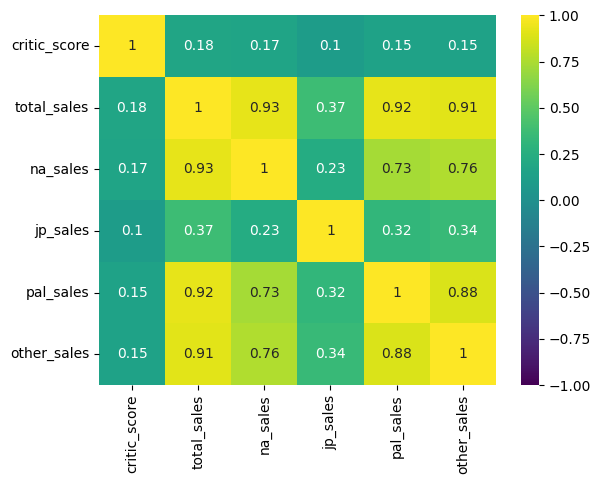

In [76]:
temp = df_vg2[df_vg2['critic_score'].notna()]

# Se hace un mapa de calor (heatmap) para determinar la relacion de critic_score con las columnas de ventas
sns.heatmap(temp[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(), 
            vmin = -1, vmax =1, cmap = 'viridis', annot = True);

# En general el critic_score, tiene baja relación con las ventas, por lo que, para el análisis de mercado no me es util (posiblemente debido al alto porcentaje de nulos que tiene)

In [77]:
df_vg2['critic_score'].notna().sum()


np.int64(6648)

In [78]:
df_vg2.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,6648.000000,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,60230,60230
mean,7.221194,1.077734e+05,5.424572e+04,1.096879e+04,3.169998e+04,1.078715e+04,2008-11-15 23:32:20.282251264,2009-08-16 05:38:49.749294336
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1990-01-01 00:00:00,1990-01-01 00:00:00
25%,6.400000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2002-12-19 00:00:00,2003-05-28 00:00:00
50%,7.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2009-08-27 00:00:00,2009-11-04 00:00:00
75%,8.300000,2.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2014-11-18 00:00:00,2018-04-20 00:00:00
max,10.000000,2.032000e+07,9.760000e+06,2.130000e+06,9.850000e+06,3.120000e+06,2024-12-31 00:00:00,2024-01-28 00:00:00
std,1.456204,4.787846e+05,2.484986e+05,6.130193e+04,1.911710e+05,6.614357e+04,NaN,NaN


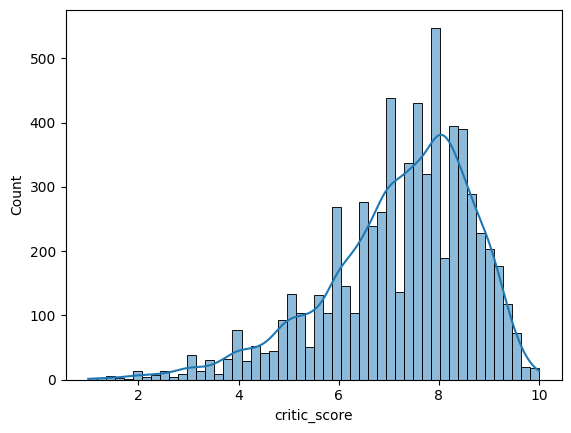

In [79]:
sns.histplot(data=df_vg2['critic_score'],
             bins=50,
             kde=True);

In [80]:
# Crear una columna que clasifique las calificaciones en rangos (bajas, medias, altas)
bins = [0, 5, 7, 10]
labels = ['Bajas', 'Medias', 'Altas']
df_vg2['calificacion_critica'] = pd.cut(df_vg2['critic_score'], bins=bins, labels=labels, right=False)

In [81]:
df_vg2.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,6648.000000,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,6.023000e+04,60230,60230
mean,7.221194,1.077734e+05,5.424572e+04,1.096879e+04,3.169998e+04,1.078715e+04,2008-11-15 23:32:20.282251264,2009-08-16 05:38:49.749294336
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1990-01-01 00:00:00,1990-01-01 00:00:00
25%,6.400000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2002-12-19 00:00:00,2003-05-28 00:00:00
50%,7.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2009-08-27 00:00:00,2009-11-04 00:00:00
75%,8.300000,2.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2014-11-18 00:00:00,2018-04-20 00:00:00
max,10.000000,2.032000e+07,9.760000e+06,2.130000e+06,9.850000e+06,3.120000e+06,2024-12-31 00:00:00,2024-01-28 00:00:00
std,1.456204,4.787846e+05,2.484986e+05,6.130193e+04,1.911710e+05,6.614357e+04,NaN,NaN


In [82]:
df_vg2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60230 entries, 0 to 64015
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 60230 non-null  object        
 1   console               60230 non-null  object        
 2   genre                 60230 non-null  object        
 3   publisher             60230 non-null  object        
 4   developer             60230 non-null  object        
 5   critic_score          6648 non-null   float64       
 6   total_sales           60230 non-null  float64       
 7   na_sales              60230 non-null  float64       
 8   jp_sales              60230 non-null  float64       
 9   pal_sales             60230 non-null  float64       
 10  other_sales           60230 non-null  float64       
 11  release_date          60230 non-null  datetime64[ns]
 12  last_update           60230 non-null  datetime64[ns]
 13  console_company      

In [83]:
# Renombrar las columnas con nombres más entendibles en español
df_vg2 = df_vg2.rename(columns={
    'title': 'titulo',
    'console': 'consola',
    'genre': 'genero',
    'publisher': 'editor',
    'developer': 'desarrollador',
    'critic_score': 'puntuacion_critica',
    'total_sales': 'ventas_totales',
    'na_sales': 'ventas_na',
    'jp_sales': 'ventas_japon',
    'pal_sales': 'ventas_europa',
    'other_sales': 'ventas_otros',
    'release_date': 'fecha_lanzamiento',
    'last_update': 'ultima_actualizacion',
    'console_company': 'empresa_consola',
    'calificacion_critica': 'categoria_calificacion'
})

# Mostrar las primeras filas para verificar los cambios
df_vg2.head()


,titulo,consola,genero,editor,desarrollador,puntuacion_critica,ventas_totales,ventas_na,ventas_japon,ventas_europa,ventas_otros,fecha_lanzamiento,ultima_actualizacion,empresa_consola,categoria_calificacion
0,Grand Theft Auto V,PS3,Acción,Rockstar Games,Rockstar North,9.4,20320000.0,6370000.0,990000.0,9850000.0,3120000.0,2013-09-17,2013-09-17,Sony,Altas
1,Grand Theft Auto V,PS4,Acción,Rockstar Games,Rockstar North,9.7,19390000.0,6060000.0,600000.0,9710000.0,3020000.0,2014-11-18,2018-01-03,Sony,Altas
2,Grand Theft Auto: Vice City,PS2,Acción,Rockstar Games,Rockstar North,9.6,16150000.0,8410000.0,470000.0,5490000.0,1780000.0,2002-10-28,2002-10-28,Sony,Altas
3,Grand Theft Auto V,X360,Acción,Rockstar Games,Rockstar North,NaN,15860000.0,9060000.0,60000.0,5330000.0,1420000.0,2013-09-17,2013-09-17,Microsoft,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000.0,6180000.0,410000.0,6050000.0,2440000.0,2015-11-06,2018-01-14,Sony,Altas


In [84]:
# Convertir las columnas de ventas a enteros sin decimales para evitar posibles errores
ventas_columnas = ['ventas_totales', 'ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']
df_vg2[ventas_columnas] = df_vg2[ventas_columnas].fillna(0).astype(int)

# Mostrar las primeras filas para verificar el cambio
df_vg = df_vg2
df_vg.head(5)

,titulo,consola,genero,editor,desarrollador,puntuacion_critica,ventas_totales,ventas_na,ventas_japon,ventas_europa,ventas_otros,fecha_lanzamiento,ultima_actualizacion,empresa_consola,categoria_calificacion
0,Grand Theft Auto V,PS3,Acción,Rockstar Games,Rockstar North,9.4,20320000,6370000,990000,9850000,3120000,2013-09-17,2013-09-17,Sony,Altas
1,Grand Theft Auto V,PS4,Acción,Rockstar Games,Rockstar North,9.7,19390000,6060000,600000,9710000,3020000,2014-11-18,2018-01-03,Sony,Altas
2,Grand Theft Auto: Vice City,PS2,Acción,Rockstar Games,Rockstar North,9.6,16149999,8410000,470000,5490000,1780000,2002-10-28,2002-10-28,Sony,Altas
3,Grand Theft Auto V,X360,Acción,Rockstar Games,Rockstar North,NaN,15860000,9060000,60000,5330000,1420000,2013-09-17,2013-09-17,Microsoft,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000,6180000,410000,6050000,2440000,2015-11-06,2018-01-14,Sony,Altas


In [85]:
bvt.cardinalidad(df_vg)

,Columna,Card,%_Card,Tipo,Clasificada_como
0,titulo,37548,62.341026,object,Numerica Continua
1,consola,77,0.127843,object,Numerica Discreta
2,genero,8,0.013282,object,Categorica
3,editor,3304,5.485638,object,Numerica Discreta
4,desarrollador,8726,14.487797,object,Numerica Discreta
5,puntuacion_critica,89,0.147767,float64,Numerica Discreta
6,ventas_totales,481,0.798605,int64,Numerica Discreta
7,ventas_na,318,0.527976,int64,Numerica Discreta
8,ventas_japon,119,0.197576,int64,Numerica Discreta
9,ventas_europa,256,0.425037,int64,Numerica Discreta


# **Clasificación, Hipótesis e Insights**

| Nombre del campo                  | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas                                                     |
|-----------------------------------|-----------------------------------------------------------------------------|-----------------------|---------------------|-----------------------------------------------------------|
| titulo                             | Título del videojuego                                                       | Numerica Continua     | 3                   | Identificador único para cada juego                     |
| consola                           | Consola/plataforma a la que pertenece el videojuego                                    | Numerica Discreta     | 1                   | Relacionado con la plataforma del juego                |
| genero                             | Género del videojuego                                                       | Categorica            | 1                   | Clave para análisis de tipo de juego y preferencias     |
| editor                         | Publicador del videojuego                                                   | Numerica Discreta     | 2                   | Puede indicar la  calidad de marketing   |
| desarrolador                         | Desarrollador del videojuego                                                | Numerica Discreta     | 2                   | Clave para analizar la calidad de producción            |
| puntuacion_critica                      | Puntuación del videojuego por críticos                                      | Numerica Discreta     | 3                   | Indicador clave para la recepción del juego              |
| ventas_totales                       | Ventas totales de copias del videojuego (millones)                                              | Numerica Discreta     | 0                   | Métrica clave para entender el éxito del juego         |
| ventas_na                          | Ventas en América del Norte de copias del videojuego (millones)                                                | Numerica Discreta     | 1                   | Detalle regional para análisis de mercado                 |
| ventas_japon                          | Ventas en Japón de copias del videojuego (millones)                                                            | Numerica Discreta     | 1                   | Detalle regional para análisis de mercado                 |
| ventas_europa                         | Ventas en regiones PAL (Europa) de copias del videojuego (millones)                                                     | Numerica Discreta     | 1                   | Detalle regional para análisis de mercado                 |
| ventas_otros                       | Ventas en otras regiones del mundo de copias del videojuego (millones)                                          | Numerica Discreta     | 2                   | Métrica de ventas globales menos específicas          |
| fecha_lanzamiento                      | Fecha de lanzamiento del videojuego                                         | Fecha / datetime      | 1                   | Influye en la antigüedad y del juego              |
| ultima_actualizacion                       | Última actualización del videojuego                                         | Fecha / datetime      | 3                   | Útil para análisis de soporte y actualizaciones           |
| empresa_consola                   | Empresa que produce la consola (Sony, Microsoft, Nintendo, etc.)            | Categórica            | 1                   | Clave para analizar la competencia entre plataformas    |
| categoria_calificacion                     | Calificaciones de la critica por rango (Bajas : 0-5, Medias: 5-7, Altas: 7-10)            | Categórica            | 3                   | Clave para analizar si las ventas se ven influidas por la critica (Pero tiene demasiados valores nulos como para considerarla clave)    |

### **Key Insights:**

1. **Total de Ventas global vs Compañia de la consola**: Comparar como se han comportado las diferentes consolas/compañias con respecto a las ventas globales de videojuegos con el proposito de determinar **cual de estas ha liderado en ventas**.

2. **Año de lanzamiento vs Total de Ventas global**: Analizar como las ventas han fluctuado con el paso del tiempo.

3. **Total de Ventas por región (na,europa,japon,otros) vs Compañia de la consola vs Género**: Determinar cual compañia es mas popular por región (Dependiendo de la compañia lider, se infiere el tipo de consola, por ejemplo, Sony -> PlayStation, Microsoft -> XBox...) y género.

4. **Total de Ventas global vs Criticas vs Género**: Analizar cómo la calificación de la crítica y el género de un videojuego pueden influir en las ventas globales de este.

5. **Género vs Ventas totales vs Año de lanzamiento**: Identificar que generos han tenido mas ventas globales al pasar del tiempo.

### **Identificar Tendencias**

- **Géneros más rentables**: Identificar los géneros que han sido populares y rentables.

- **Compañias de consolas clave**: Identificar las compañias de consolas de mayor éxito y la relación de los géneros con estas.

- **Tendencias regionales**: Ver si hay diferencias significativas en los géneros más populares por región. Por ejemplo, los juegos de RPG pueden ser muy populares en Japón (jp), mientras que los juegos de acción pueden tener más éxito en Norteamérica (na).

# **Análisis Univariante**

In [86]:
# Filtrar las filas donde todas las columnas de ventas son mayores que 0 para hacer un analisis de ventas

df_vg_sales = df_vg.loc[
    (df_vg["ventas_totales"] > 0) & 
    (df_vg["ventas_na"] > 0) & 
    (df_vg["ventas_japon"] > 0) & 
    (df_vg["ventas_europa"] > 0) & 
    (df_vg["ventas_otros"] > 0)
]

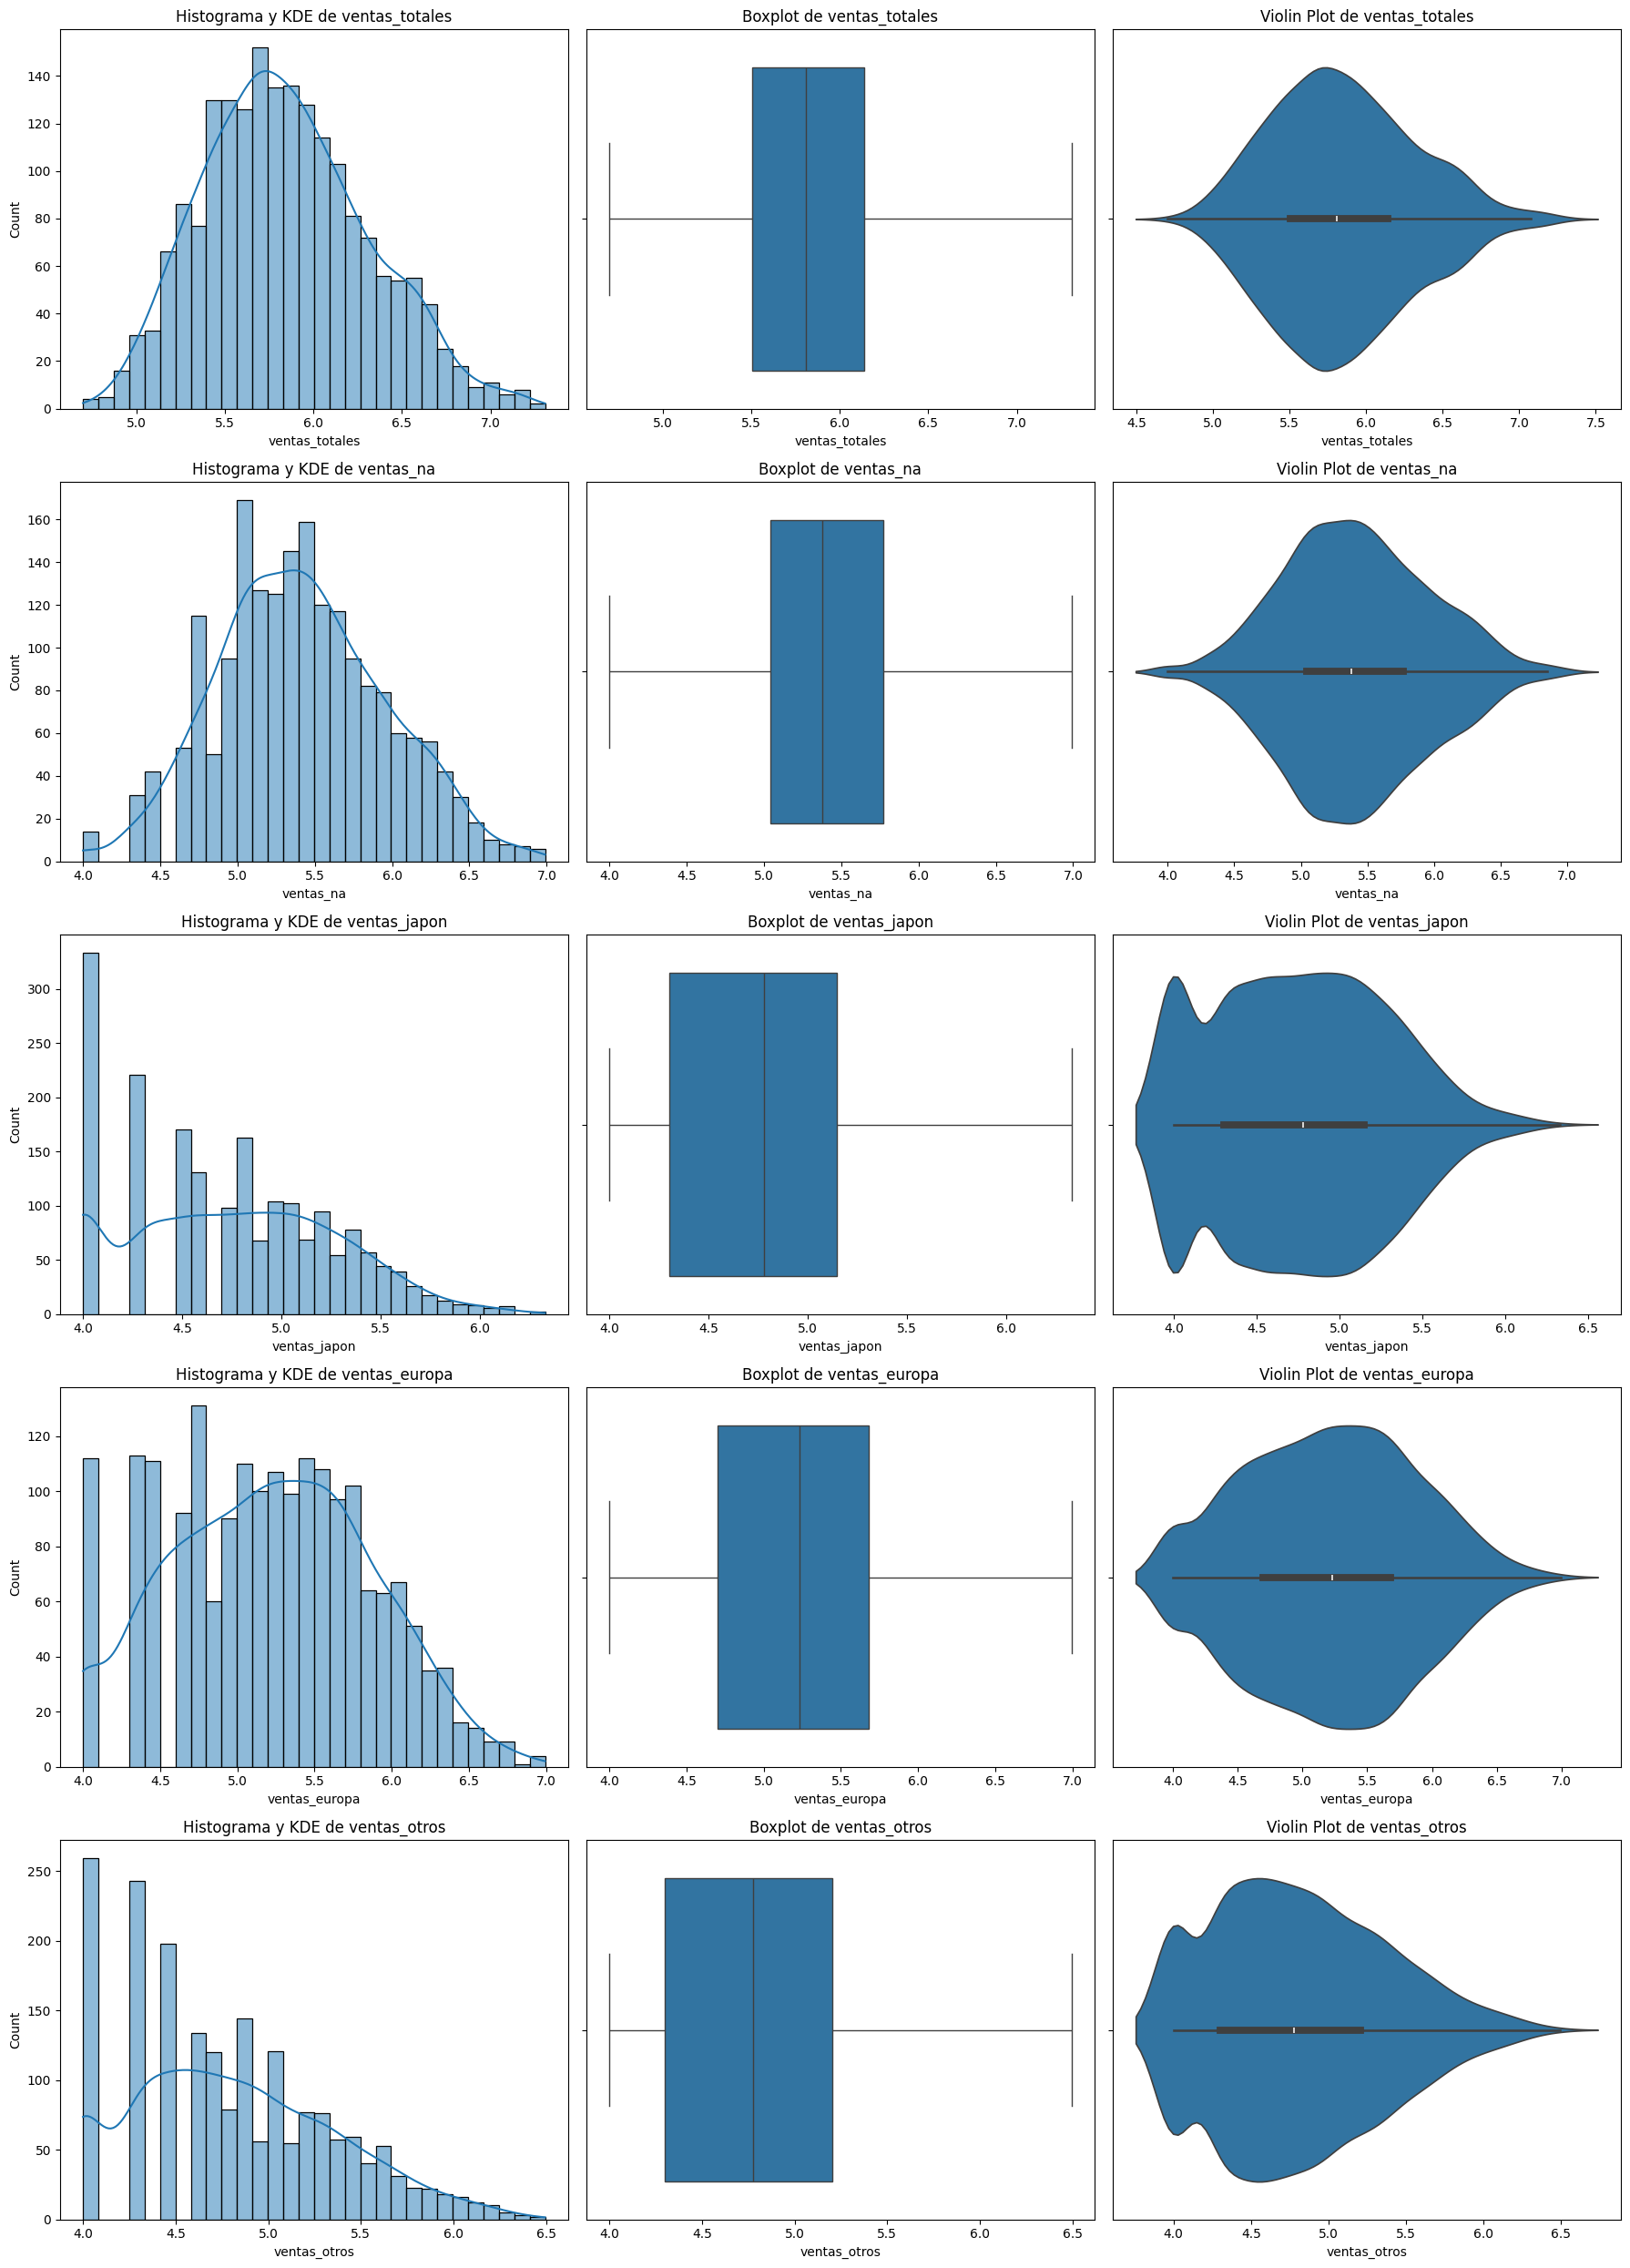

In [87]:
sales_col = ["ventas_totales", "ventas_na", "ventas_japon", "ventas_europa", "ventas_otros"]
df_vg_sales[sales_col] = df_vg_sales[sales_col].apply(np.log10)

bvt.plot_combined_graphs(df_vg_sales,
                        sales_col,
                        whisker_width= 4.5,
                        bins=30)

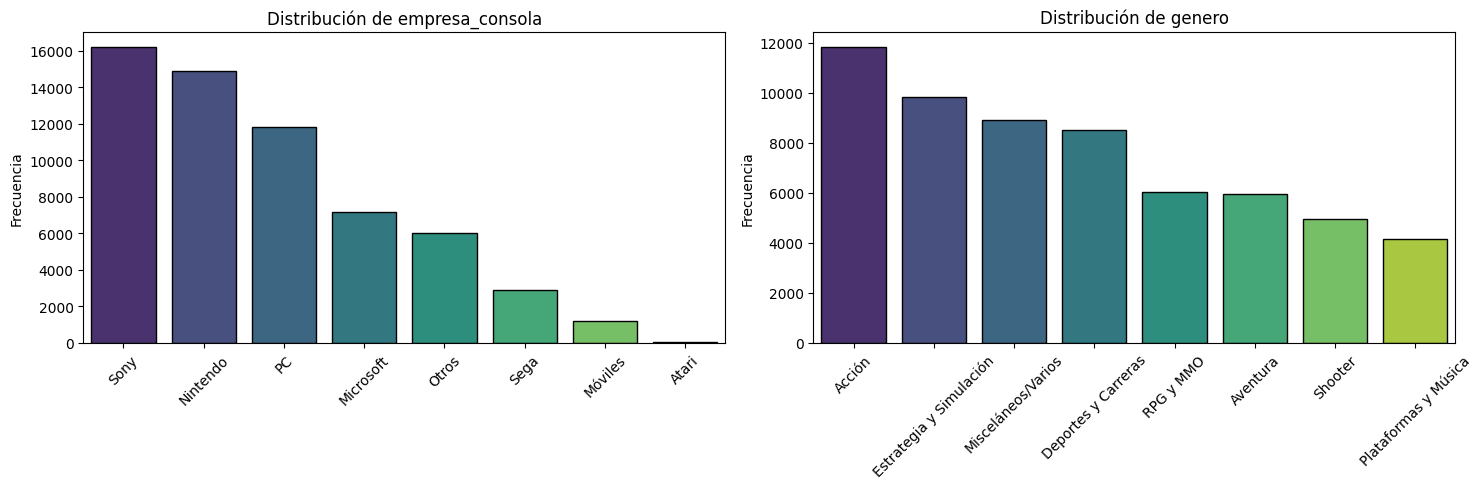

In [88]:
bvt.pinta_distribucion_categoricas(df_vg, 
                                   ["empresa_consola", "genero"], 
                                   relativa = False)

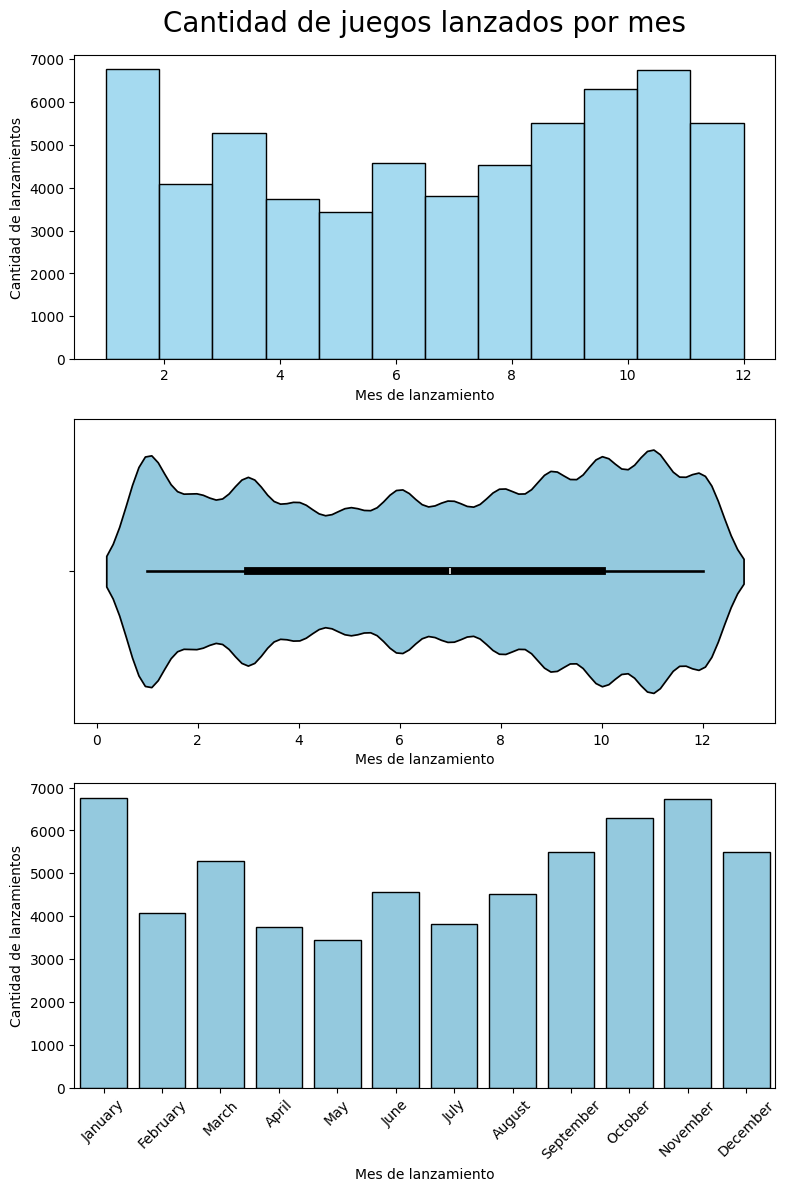

In [89]:
# Crear figura y subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Histograma
sns.histplot(data=df_vg['fecha_lanzamiento'].dt.month,
             bins=12,
             kde=False,
             color="skyblue",
             ax=axs[0])
axs[0].set_xlabel('Mes de lanzamiento')
axs[0].set_ylabel('Cantidad de lanzamientos')
axs[0].set_title('Cantidad de juegos lanzados por mes', fontsize = 20, y=1.05)

# Violín
sns.violinplot(x=df_vg['fecha_lanzamiento'].dt.month, 
               color="skyblue", 
               edgecolor="black", 
               ax=axs[1])
axs[1].set_xlabel('Mes de lanzamiento')

# Gráfico de barras
month_counts = df_vg['fecha_lanzamiento'].dt.month.value_counts().sort_index()
month_names = [calendar.month_name[i] for i in month_counts.index]
sns.barplot(x=month_names, 
            y=month_counts.values, 
            color="skyblue", 
            edgecolor="black", 
            ax=axs[2])
axs[2].set_xlabel('Mes de lanzamiento')
axs[2].set_ylabel('Cantidad de lanzamientos')
axs[2].tick_params(axis='x', rotation=45)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

# **Análisis Bivariante**

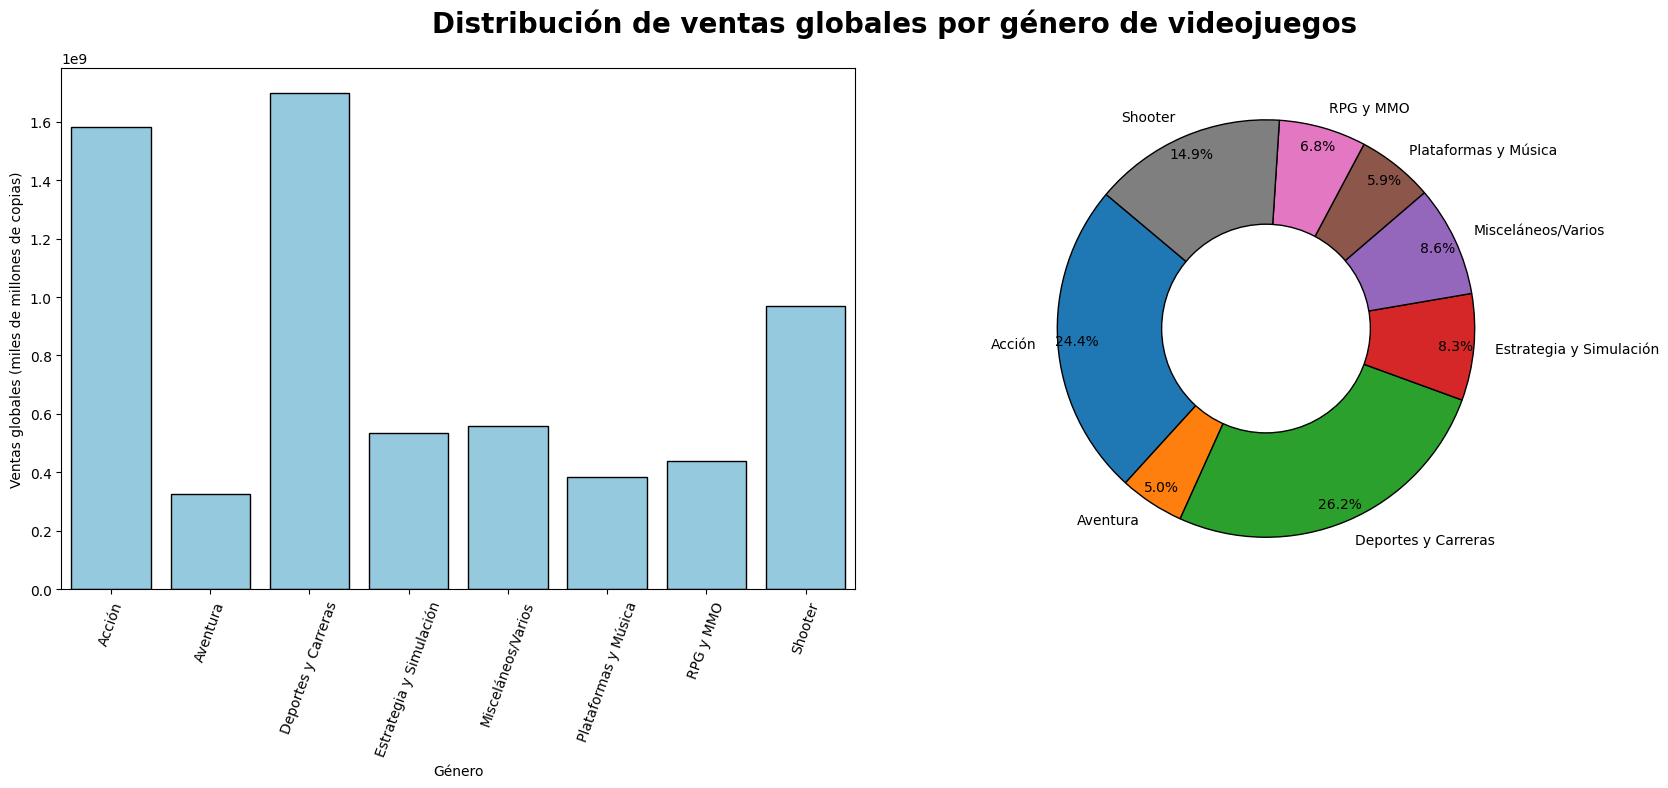

In [90]:
# Crear subplots para los gráficos
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Agrupar por género y sumar las ventas globales
ventas_por_genero = df_vg.groupby('genero')['ventas_totales'].sum().reset_index()

# Gráfico de barras
sns.barplot(x="genero", 
            y=ventas_por_genero["ventas_totales"], 
            data=ventas_por_genero, 
            errorbar=None, 
            color="skyblue",
            edgecolor="black",
            ax=axs[0])

# Personalización del gráfico de barras
axs[0].set_xticklabels(ventas_por_genero["genero"], rotation=70)
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Ventas globales (miles de millones de copias)')

# Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    ventas_por_genero["ventas_totales"], 
    labels=ventas_por_genero["genero"], 
    autopct='%1.1f%%',           # Mostrar porcentajes con 1 decimal
    startangle=140,              # Ángulo de inicio
    wedgeprops={'edgecolor': 'black'},  # Bordes de las secciones
    pctdistance=0.91             # Ajustar posición de los porcentajes
)

# Añadir un círculo blanco al centro para convertir el gráfico en dona
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor='black')
axs[1].add_artist(centre_circle)

plt.suptitle("Distribución de ventas globales por género de videojuegos", fontsize = 20,fontweight='bold')

# Ajustar layout para evitar solapamientos

plt.tight_layout()
plt.show()


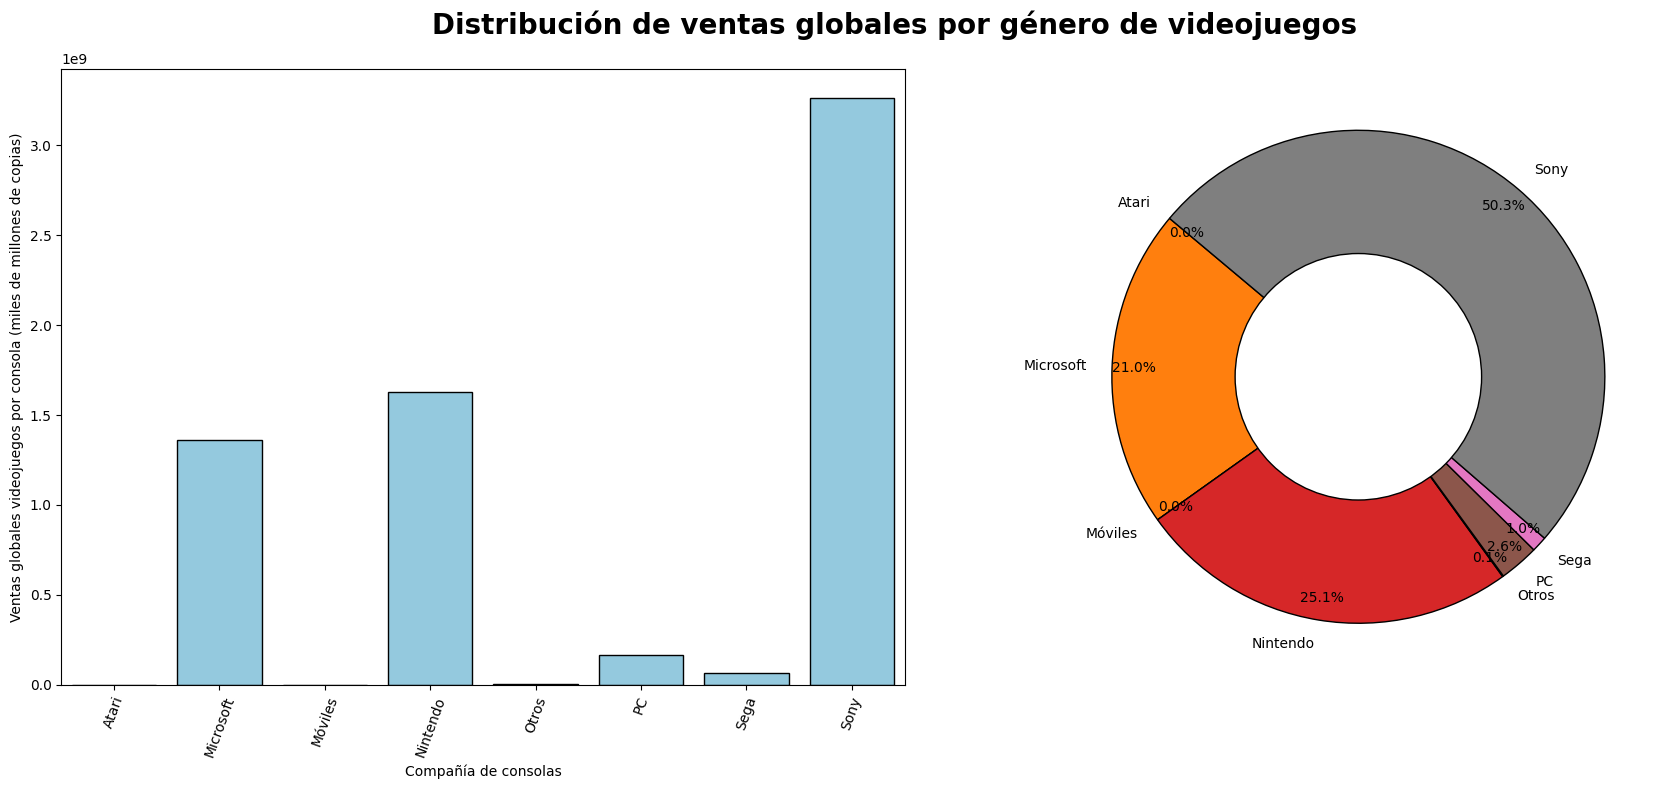

In [91]:
# Agrupar por empresa de consola y sumar las ventas globales
ventas_por_empresa = df_vg.groupby('empresa_consola')['ventas_totales'].sum().reset_index()

# Crear subplots para los gráficos
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras
sns.barplot(x="empresa_consola", 
            y=ventas_por_empresa["ventas_totales"], 
            data=ventas_por_empresa, 
            errorbar=None, 
            color="skyblue",
            edgecolor="black",
            ax=axs[0])

# Personalización del gráfico de barras
axs[0].set_xticklabels(ventas_por_empresa["empresa_consola"], rotation=70)
axs[0].set_xlabel('Compañía de consolas')
axs[0].set_ylabel('Ventas globales videojuegos por consola (miles de millones de copias)')

# Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    ventas_por_empresa["ventas_totales"], 
    labels=ventas_por_empresa["empresa_consola"], 
    autopct='%1.1f%%',           # Mostrar porcentajes con 1 decimal
    startangle=140,              # Ángulo de inicio
    wedgeprops={'edgecolor': 'black'},  # Bordes de las secciones
    pctdistance=0.91             # Ajustar posición de los porcentajes
)

# Añadir un círculo blanco al centro para convertir el gráfico en dona
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor='black')
axs[1].add_artist(centre_circle)


plt.suptitle("Distribución de ventas globales por género de videojuegos", fontsize = 20, fontweight='bold')

# Ajustar layout para evitar solapamientos
plt.tight_layout()
plt.show()


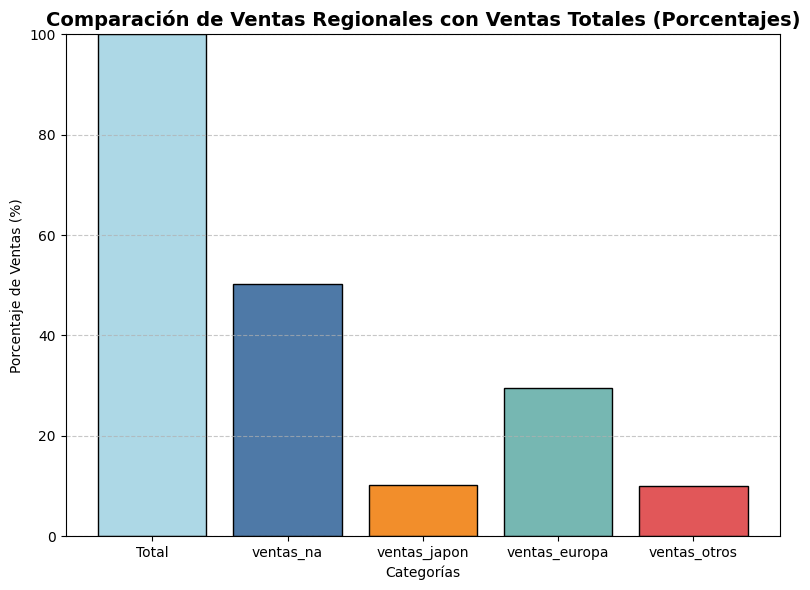

In [92]:
# Seleccionar columnas relevantes y sumar las ventas regionales
region_sales_col = ['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']
ventas_por_region = df_vg[region_sales_col].sum()

# Calcular las ventas totales
ventas_totales = df_vg['ventas_totales'].sum()

# Crear un nuevo DataFrame con porcentajes
ventas_por_region_porc = (ventas_por_region / ventas_totales) * 100
ventas_totales_porc = ventas_totales / ventas_totales * 100  # Total siempre será 100%

# Crear un gráfico de barras para ventas regionales y totales en porcentaje
plt.figure(figsize=(8, 6))
plt.bar('Total', ventas_totales_porc, color='lightblue', label='Ventas Totales', edgecolor='black')
plt.bar(ventas_por_region_porc.index, ventas_por_region_porc, 
        color=['#4E79A7', '#F28E2B', '#76B7B2', '#E15759'], edgecolor='black')

# Personalización del gráfico
plt.title('Comparación de Ventas Regionales con Ventas Totales (Porcentajes)', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje de Ventas (%)')
plt.xlabel('Categorías')

plt.ylim(0, 100)  # Limitar el eje Y al 100%

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


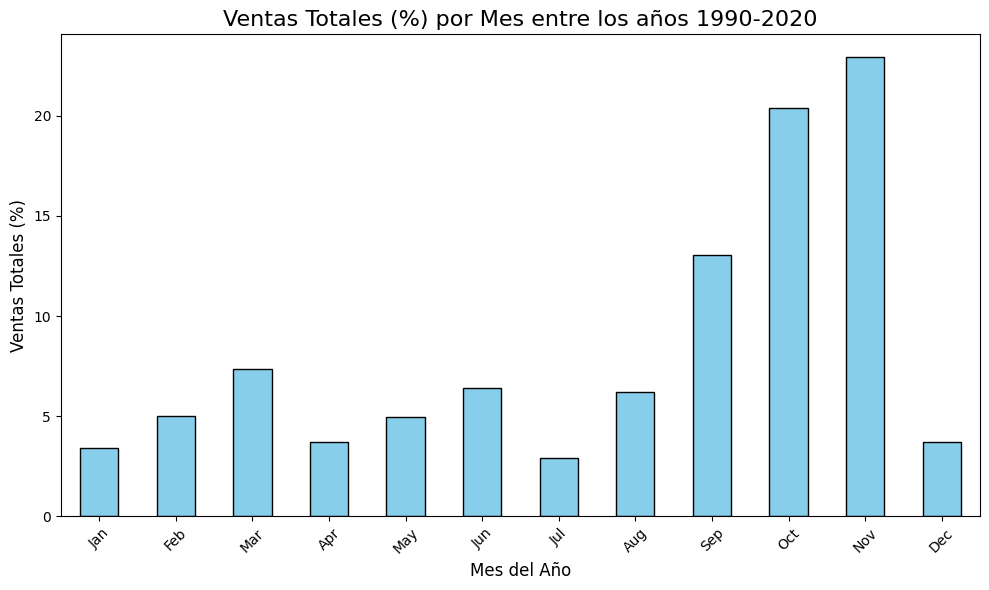

In [93]:
# Extraer el mes de la fecha de lanzamiento
df_vg['mes'] = df_vg['fecha_lanzamiento'].dt.month  # Extraer el mes

# Agrupar por mes, sumando las ventas totales
ventas_por_mes = df_vg.groupby('mes')['ventas_totales'].sum()

# Calcular el porcentaje de ventas por mes
ventas_por_mes_porcentaje = round((ventas_por_mes / ventas_por_mes.sum()) * 100, 2)

# Reemplazar los números de los meses con los nombres
month_names = {i: calendar.month_abbr[i] for i in range(1, 13)}
ventas_por_mes_porcentaje.index = ventas_por_mes_porcentaje.index.map(month_names)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_mes_porcentaje.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalización del gráfico
plt.title("Ventas Totales (%) por Mes entre los años 1990-2020", fontsize=16)
plt.xlabel("Mes del Año", fontsize=12)
plt.ylabel("Ventas Totales (%)", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.tight_layout()
plt.show()

# **Análisis Multivariante**

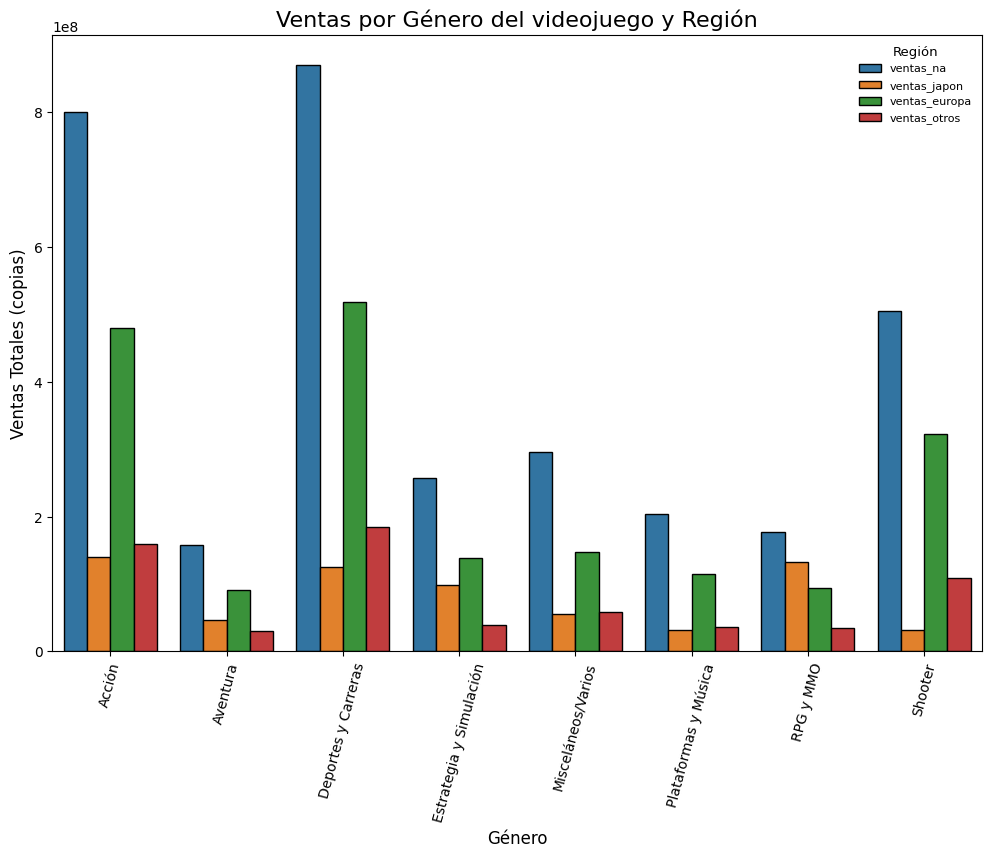

In [94]:
# Agrupar los datos por género y región
sales_by_genre_region = df_vg.groupby(['genero'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum().reset_index()

# Convertir a formato largo para graficar
sales_by_genre_region_melted = sales_by_genre_region.melt(id_vars=['genero'],
                                                         value_vars=['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros'],
                                                         var_name='region', value_name='ventas')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_genre_region_melted, 
            x='genero', 
            y='ventas', 
            hue='region', 
            estimator=sum,
            edgecolor="black")

# Título y etiquetas
plt.title('Ventas por Género del videojuego y Región', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales (copias)', fontsize=12)
plt.xticks(rotation=75)

# Personalizar la legenda
plt.legend(title="Región", title_fontsize='9.5', fontsize='8', frameon=False)

# Mostrar el gráfico
plt.show()

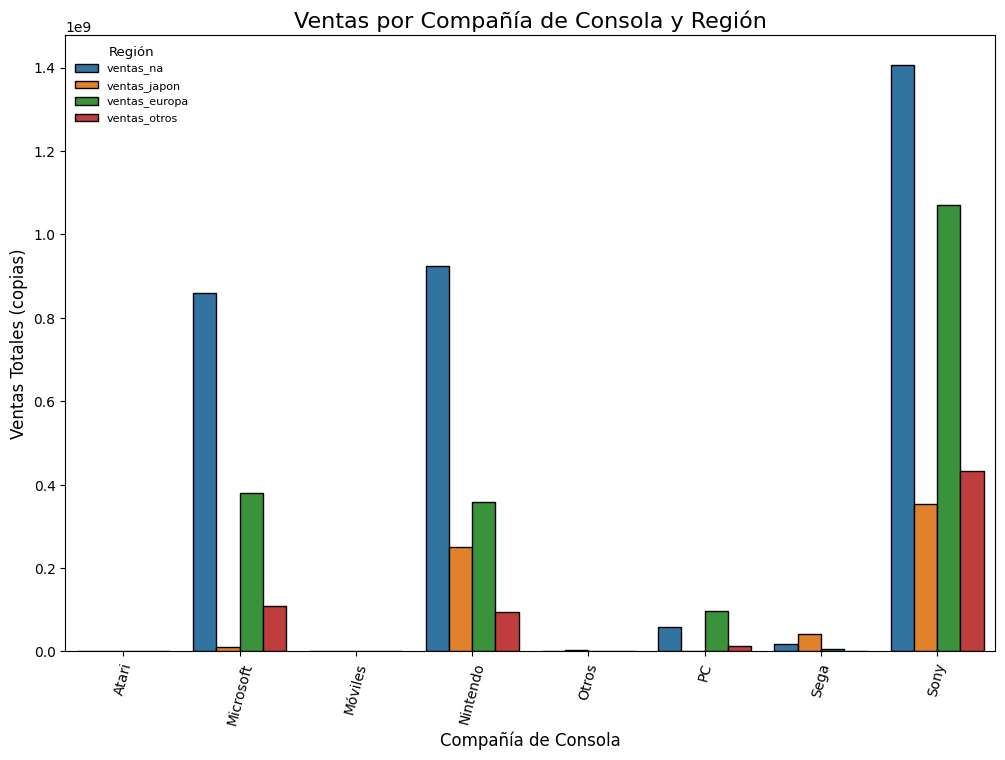

In [95]:
# Agrupar los datos por género y compañía de consolas
sales_by_console_company = df_vg.groupby(['empresa_consola'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum().reset_index()

# Convertir a formato largo para graficar
sales_by_console_company_melted = sales_by_console_company.melt(id_vars=['empresa_consola'],
                                                               value_vars=['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros'],
                                                               var_name='region', value_name='sales')

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_console_company_melted, 
            x='empresa_consola', 
            y='sales', 
            hue='region', 
            estimator=sum,
            edgecolor="black")

# Título y etiquetas
plt.title('Ventas por Compañía de Consola y Región', fontsize=16)
plt.xlabel('Compañía de Consola', fontsize=12)
plt.ylabel('Ventas Totales (copias)', fontsize=12)
plt.xticks(rotation=75)

# Personalizar la legenda
plt.legend(title="Región", title_fontsize='9.5', fontsize='8', frameon=False)

# Mostrar el gráfico
plt.show()


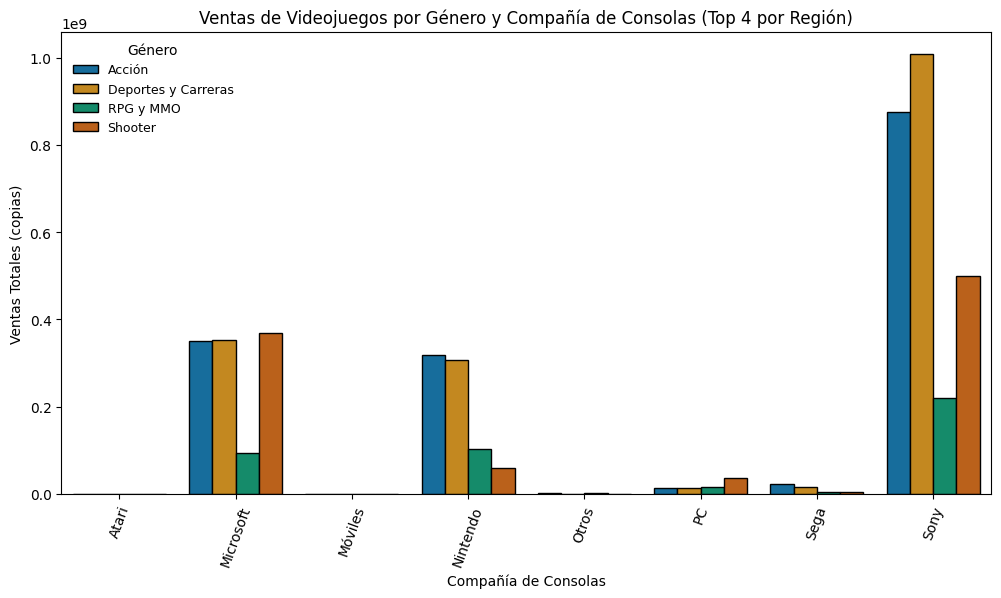

In [96]:
# Calcular los tres géneros más populares por región (sumando las ventas)
top_generos_por_region = df_vg.groupby(['genero'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum()

# Filtrar los tres géneros principales por cada región
top_generos_na = top_generos_por_region.nlargest(3, 'ventas_na').index
top_generos_jp = top_generos_por_region.nlargest(3, 'ventas_japon').index
top_generos_eu = top_generos_por_region.nlargest(3, 'ventas_europa').index
top_generos_otros = top_generos_por_region.nlargest(3, 'ventas_otros').index

# Filtrar el DataFrame original para incluir solo los géneros más populares en cada región
df_top_generos = df_vg[df_vg['genero'].isin(top_generos_na) |
                      df_vg['genero'].isin(top_generos_jp) |
                      df_vg['genero'].isin(top_generos_eu) |
                      df_vg['genero'].isin(top_generos_otros)]

# Agrupar por compañía de consola y género, sumando las ventas totales ya presentes
sales_by_console_genre = df_top_generos.groupby(['empresa_consola', 'genero'])['ventas_totales'].sum().reset_index()

# Crear el gráfico de barras con las ventas totales por compañía de consola y género
plt.figure(figsize=(12, 6))
sns.barplot(x="empresa_consola", 
            y="ventas_totales", 
            hue="genero", 
            palette="colorblind", 
            data=sales_by_console_genre,
            edgecolor="black")

# Personalización del gráfico
plt.xticks(rotation=70)
plt.xlabel('Compañía de Consolas')
plt.ylabel('Ventas Totales (copias)')
plt.title('Ventas de Videojuegos por Género y Compañía de Consolas (Top 4 por Región)')

# Personalizar la legenda
plt.legend(title="Género", title_fontsize='10', fontsize='9', frameon=False)

plt.show()

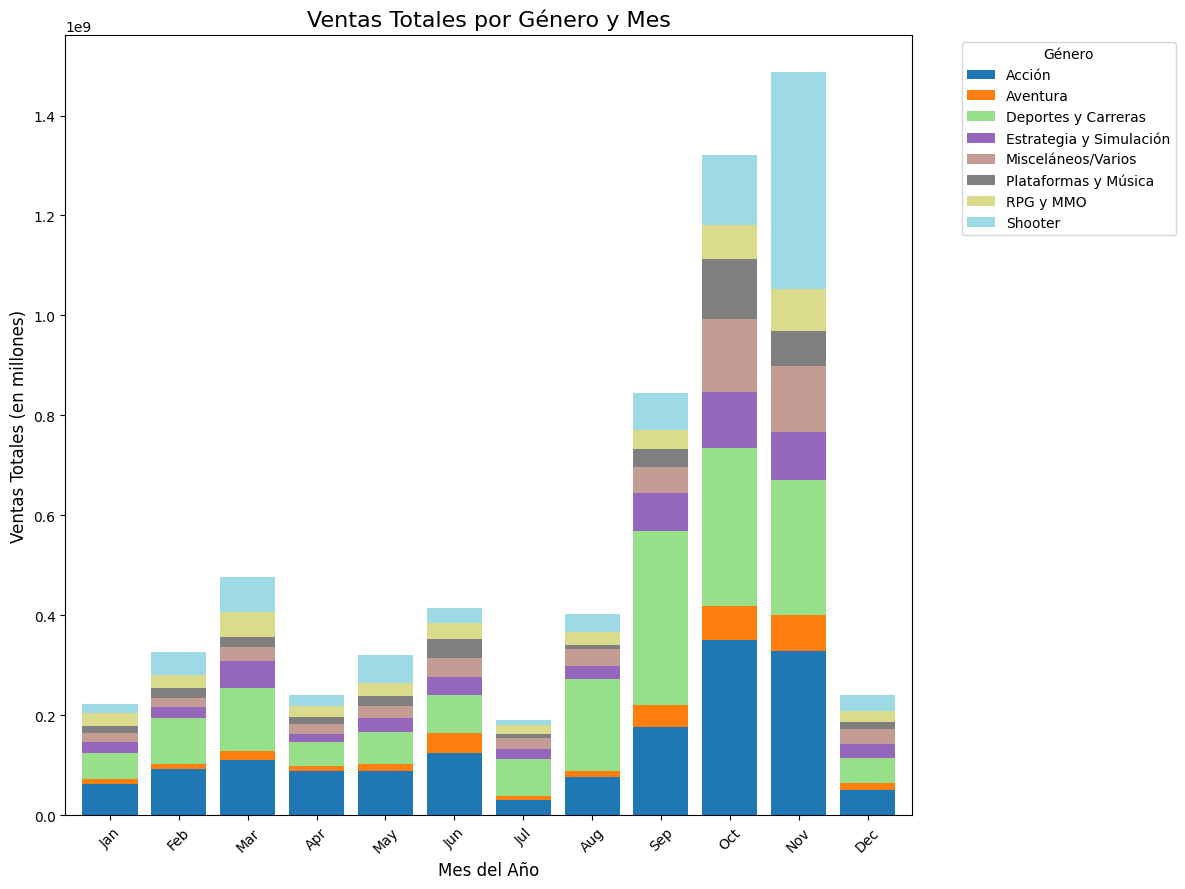

In [97]:
# Extraer el mes de la fecha de lanzamiento
df_vg['mes'] = df_vg['fecha_lanzamiento'].dt.month  # Extraer el mes

# Agrupar por mes y género, sumando las ventas
stacked_data = df_vg.groupby(['mes', 'genero'])['ventas_totales'].sum().unstack(fill_value=0)

# Reemplazar los números de los meses con los nombres
month_names = {i: calendar.month_abbr[i] for i in range(1, 13)}
stacked_data.index = stacked_data.index.map(month_names)

# Crear la figura y el eje con un tamaño ajustado
fig, ax = plt.subplots(figsize=(12, 9))

# Crear el gráfico de barras apiladas
stacked_data.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)

# Personalización del gráfico
ax.set_title("Ventas Totales por Género y Mes", fontsize=16)
ax.set_xlabel("Mes del Año", fontsize=12)
ax.set_ylabel("Ventas Totales (en millones)", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar márgenes para evitar solapamiento
plt.show()

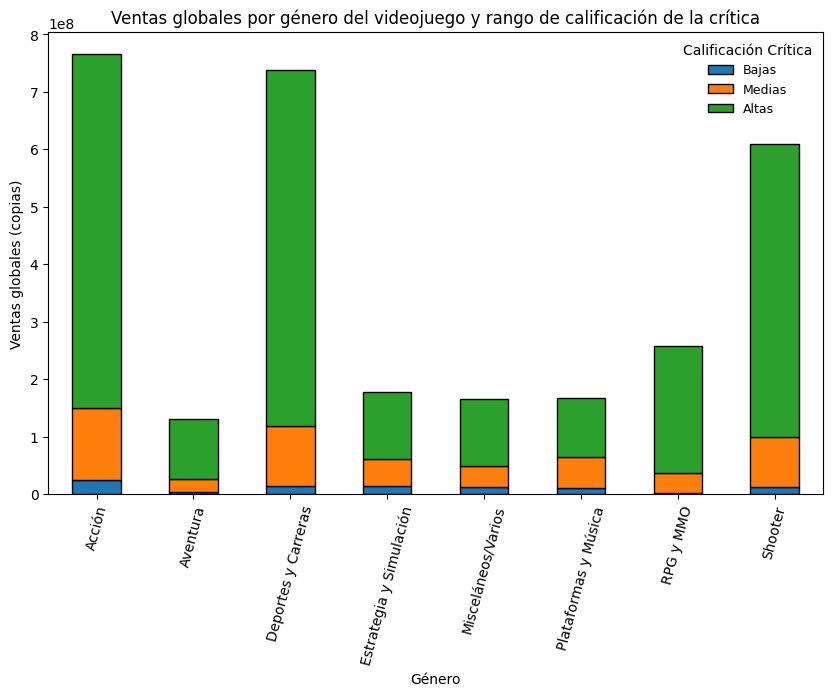

In [98]:
# Agrupar por género y rango de calificación de la crítica, y sumar las ventas globales
sales_by_genre = df_vg.groupby(['genero', 'categoria_calificacion'])['ventas_totales'].sum().unstack()

# Gráfico de barras apiladas
sales_by_genre.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6),
                    edgecolor="black")

# Personalizar el gráfico
plt.title('Ventas globales por género del videojuego y rango de calificación de la crítica')
plt.xlabel('Género')
plt.ylabel('Ventas globales (copias)')
plt.xticks(rotation=75)

# Personalizar la legenda
plt.legend(title="Calificación Crítica", title_fontsize='10', fontsize='9', frameon=False)

plt.show()

In [99]:
# Extraer el año de 'release_date'
df_vg['año_lanzamiento'] = df_vg['fecha_lanzamiento'].dt.year

# Agrupar por género y año de lanzamiento, seleccionando el videojuego con la venta más alta
mas_vendido_por_genero = df_vg.loc[df_vg.groupby(['genero', 'año_lanzamiento'])['ventas_totales'].idxmax()]

# Seleccionar las columnas relevantes
mas_vendido_por_genero = mas_vendido_por_genero[['genero', 'titulo', 'ventas_totales', 'año_lanzamiento']]

# Ordenar los resultados para mejorar la visualización
mas_vendido_por_genero = mas_vendido_por_genero.sort_values(by=['año_lanzamiento', 'ventas_totales'], ascending=[False, False])

# Mostrar solo el juego más vendido por cada año (independientemente del género)
mas_vendido_por_año = mas_vendido_por_genero.drop_duplicates('año_lanzamiento', keep='first')

mas_vendido_por_año

# NO HAY DATOS DE VENTAS ENTRE LOS AÑOS 2021-2024 / y datos insuficientes entre 2019-2020
# En caso de necesitarlo, utilizando una slicing con "mas_vendido_por_genero" podemos ver los juegos mas vendidos por cada año por genero
# Por ejemplo mas_vendido_por_genero["año_lanzamiento"] == 2010, me muestra los juegos mas vendidos por genero en el año 2010

,genero,titulo,ventas_totales,año_lanzamiento
23302,Acción,Arcade Archives: Over Top,0,2024
19012,Acción,Dead Island 2,0,2023
18931,Acción,God of War: Ragnarök,0,2022
19018,Acción,Persona 5 Strikers,0,2021
1948,RPG y MMO,Final Fantasy Type-0,810000,2020
1931,RPG y MMO,Yokai Watch 3: Sukiyaki,810000,2019
7,Acción,Red Dead Redemption 2,13940000,2018
11,Shooter,Call of Duty: WWII,13400000,2017
17,Deportes y Carreras,FIFA 17,10940000,2016
4,Shooter,Call of Duty: Black Ops 3,15090000,2015


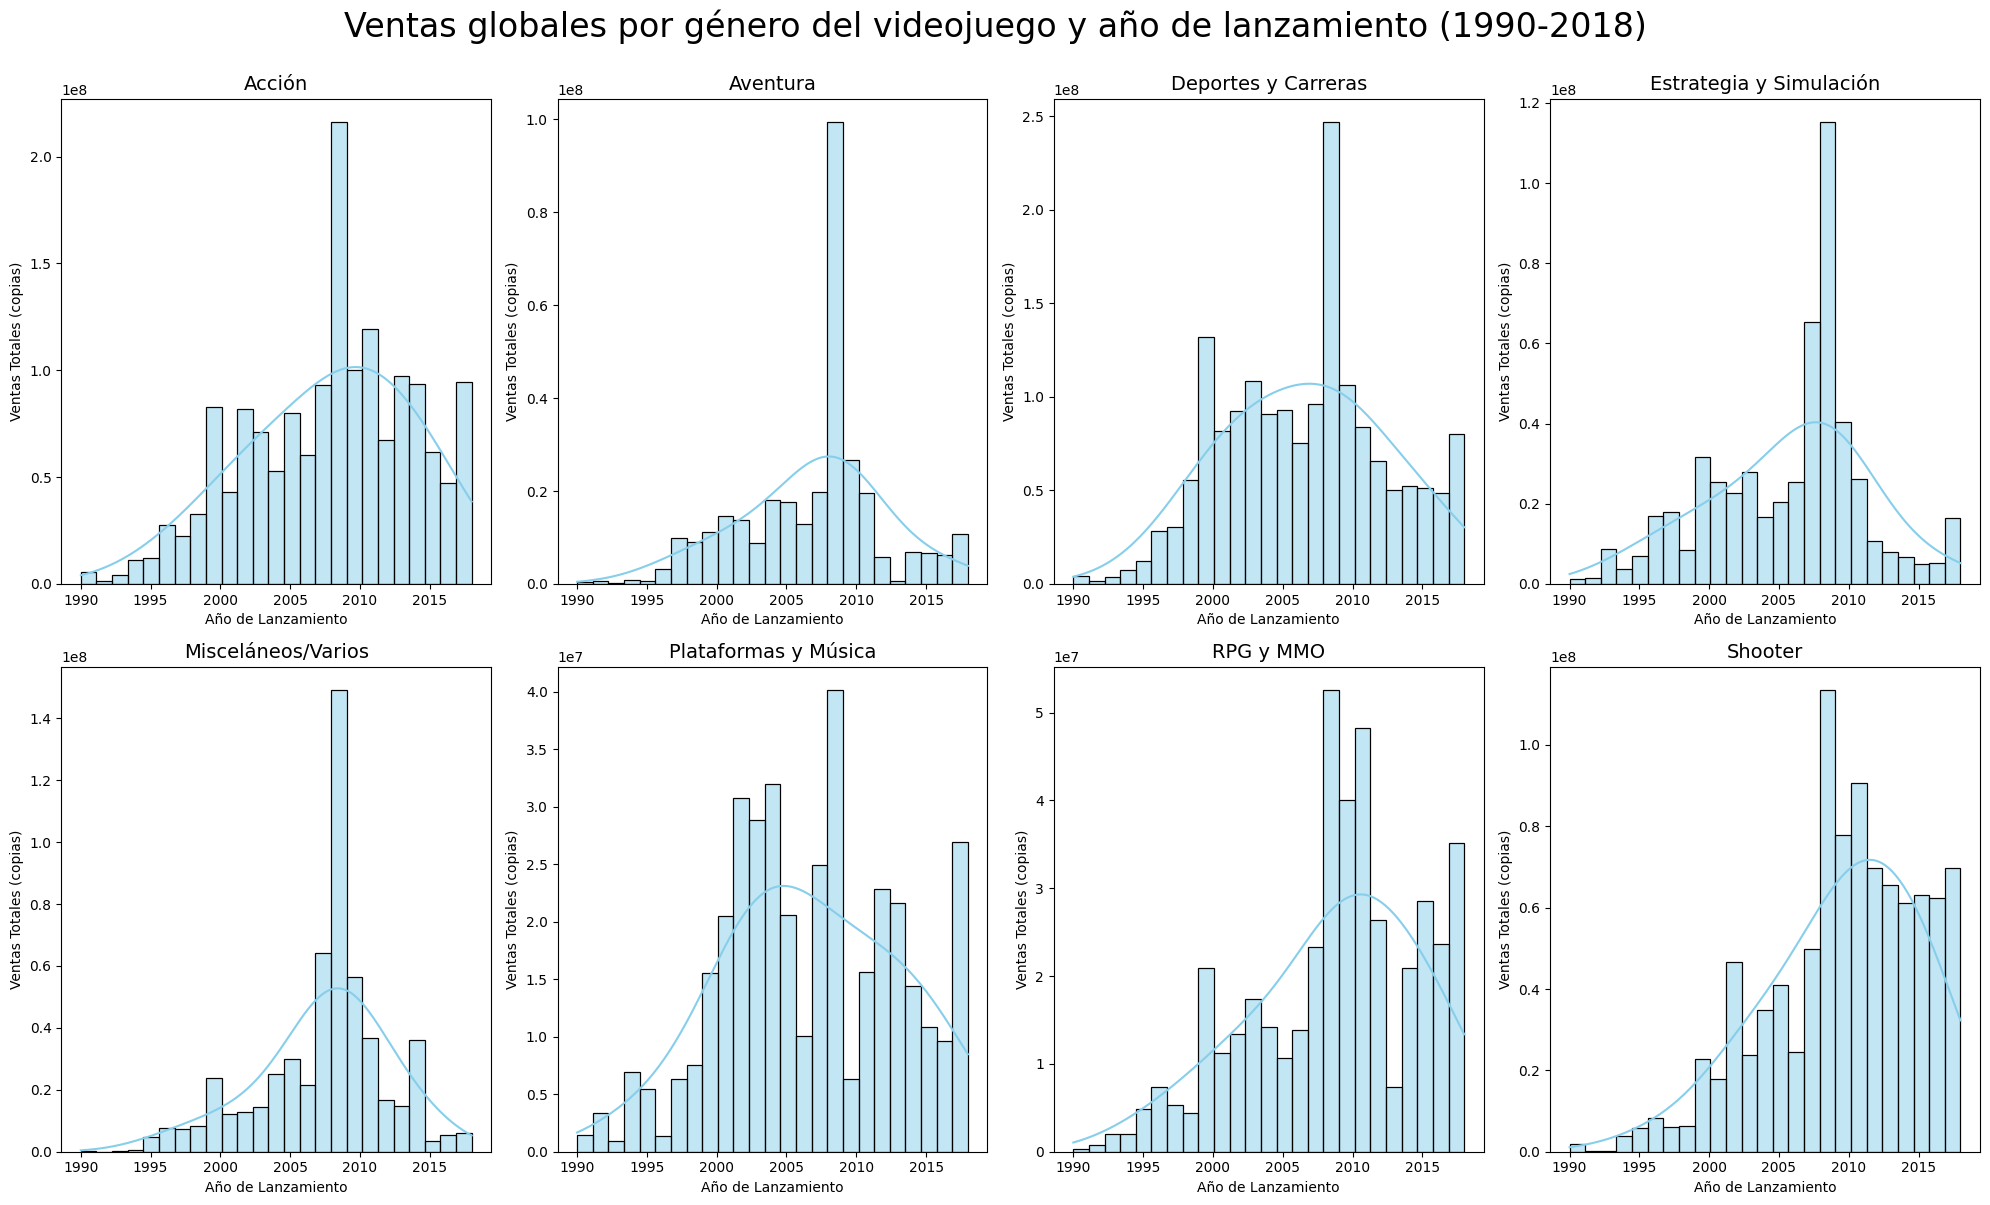

In [100]:
# Extraer el año de 'release_date'
df_vg['año_lanzamiento'] = df_vg['fecha_lanzamiento'].dt.year

# Filtrar los años 2021-2024 (~ invierte la condicion .isin(), ahora significara lo contrario)
df_vg_filtered = df_vg[~df_vg['año_lanzamiento'].isin([2019, 2020, 2021, 2022, 2023, 2024])]

# Agrupar los datos por género y año de lanzamiento
ventas_por_genero_año = df_vg_filtered.groupby(['genero', 'año_lanzamiento'])['ventas_totales'].sum().reset_index()

# Crear el gráfico con subgráficos
generos = ventas_por_genero_año['genero'].unique()
n_generos = len(generos)
n_cols = 4  # Número de columnas
n_rows = (n_generos + n_cols - 1) // n_cols  # Número de filas necesario

# Crear el objeto fig y los ejes (axes)
fig, axes = plt.subplots(n_rows, 
                         n_cols, 
                         figsize=(20, 6 * n_rows))

# Aplanar la matriz de ejes
axes = axes.flatten()

# Crear un histograma para cada género
for i, genero in enumerate(generos):
    ax = axes[i]  # Obtener el eje correspondiente
    data = ventas_por_genero_año[ventas_por_genero_año['genero'] == genero]
    
    # Crear el histograma
    sns.histplot(data=data, 
                 x="año_lanzamiento", 
                 weights="ventas_totales", 
                 kde=True, 
                 ax=ax, 
                 color="skyblue", 
                 bins=25,
                 edgecolor="black")
    
    # Títulos y etiquetas
    ax.set_title(genero, fontsize=14)
    ax.set_xlabel("Año de Lanzamiento")
    ax.set_ylabel("Ventas Totales (copias)")

# Eliminar cualquier subgráfico vacío (si hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Titulo principal
plt.suptitle("Ventas globales por género del videojuego y año de lanzamiento (1990-2018)", y=1, fontsize=24)

# Ajustar el espaciado
plt.tight_layout()

plt.show()
